## Evaluating Reasoning Module

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from pretty_confusion_matrix import pp_matrix_from_data

RESULTS_PATH = '/Users/rlopez/PTG/tim-reasoning/scripts/evaluations/resource'
RECIPE_PATH = '/Users/rlopez/PTG/tim-reasoning/tim_reasoning/resource/mit_recipes'

In [2]:
recipe_id = 'pinwheels'
perception_outputs_file = 'pinwheels_session'

#### Recipe Steps

In [3]:
with open(join(RECIPE_PATH, f'recipe_{recipe_id}.json')) as fin:
    recipe_steps = {f'Step {i}': v for i, v in enumerate (json.load(fin)['instructions'], 1)}
    
for i, s in recipe_steps.items():
    print(i, s)

Step 1 Place tortilla on cutting board.
Step 2 Use a butter knife to scoop nut butter from the jar. Spread nut butter onto tortilla, leaving 1/2-inch uncovered at the edges.
Step 3 Clean the knife by wiping with a paper towel.
Step 4 Use the knife to scoop jelly from the jar. Spread jelly over the nut butter.
Step 5 Clean the knife by wiping with a paper towel.
Step 6 Roll the tortilla from one end to the other into a log shape, about 1.5 inches thick. Roll it tight enough to prevent gaps, but not so tight that the filling leaks.
Step 7 Secure the rolled tortilla by inserting 5 toothpicks about 1 inch apart.
Step 8 Trim the ends of the tortilla roll with the butter knife, leaving 1⁄2 inch margin between the last toothpick and the end of the roll. Discard ends.
Step 9 Slide floss under the tortilla, perpendicular to the length of the roll. Place the floss halfway between two toothpicks.
Step 10 Cross the two ends of the floss over the top of the tortilla roll. Holding one end of the flo

#### Predictied vs True Values

In [4]:
results = pd.read_csv(join(RESULTS_PATH, f'results_{perception_outputs_file}.csv'))
counts = results['predicted_step'].eq(results['true_step']).value_counts().rename({True:'match', False: 'no match'})
total_accuray = counts['match']/len(results)
print('Average accuracy:', total_accuray)

Average accuracy: 0.678714859437751


In [5]:
results['match'] = results['predicted_step'].eq(results['true_step'])
performance_by_step = results.groupby('true_step')['match'].mean().round(2)
print('Accuracy for each step:')
for step_id, step_performance in enumerate(performance_by_step, 1):
    print(f'Step {step_id}: {step_performance}')

Accuracy for each step:
Step 1: 0.33
Step 2: 0.72
Step 3: 0.77
Step 4: 0.5
Step 5: 0.39
Step 6: 0.5
Step 7: 0.7
Step 8: 0.53
Step 9: 1.0
Step 10: 0.0
Step 11: 0.89
Step 12: 1.0


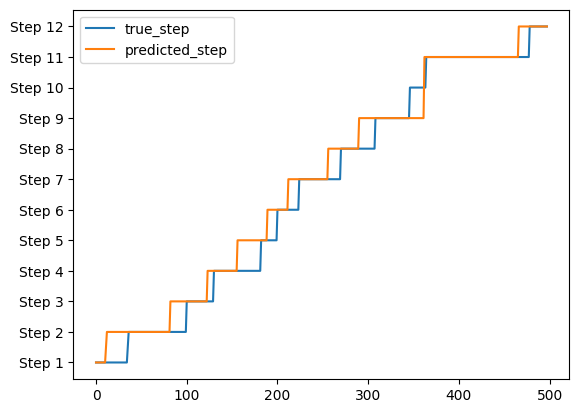

In [6]:
video_id = results['task_index'].unique()[0]
if video_id == 'all':
    video_results = results
else:
    video_results = results[results['task_index'] == video_id]
axes = video_results[['true_step', 'predicted_step']].plot()
axes.set_yticks([i+1 for i in range(len(recipe_steps))], labels=recipe_steps.keys())
axes;

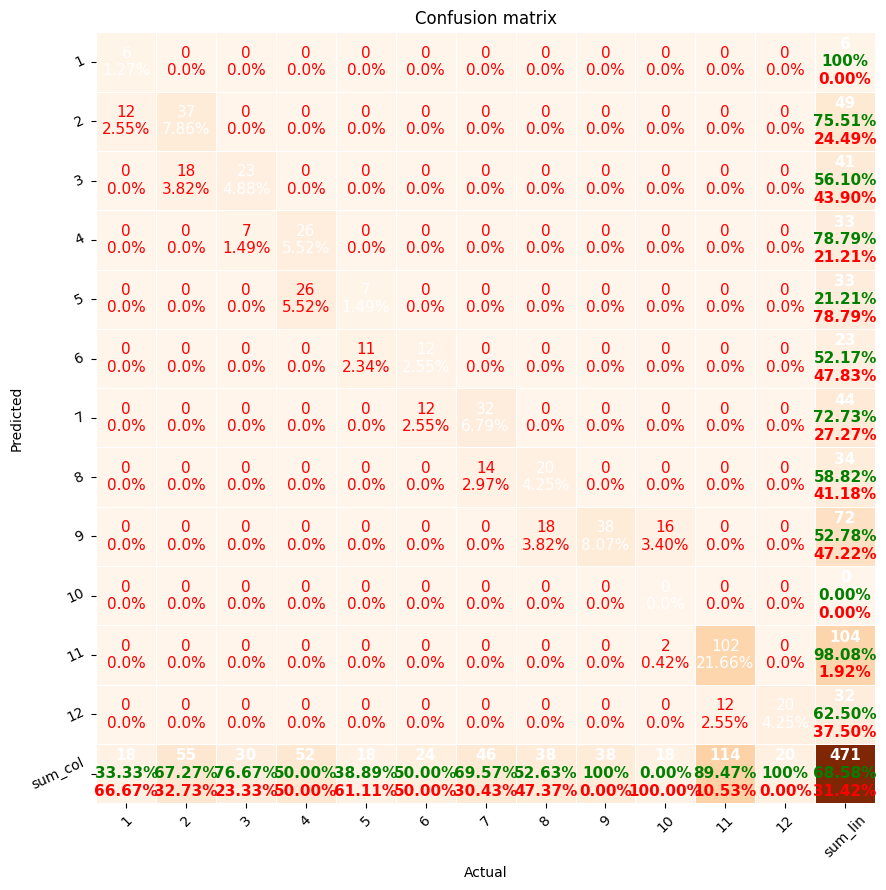

In [7]:
pp_matrix_from_data(video_results['true_step'], video_results['predicted_step'], columns=video_results['true_step'].unique().tolist())